In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [2]:
data=pd.read_csv("Data_Cortex_Nuclear.csv")
data

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [3]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [5]:
data.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

# Imputation of missing values

In [6]:
column_names=([ 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N',])

In [7]:
#Using KNN Imputer
imputer = KNNImputer()

imputed_data= imputer.fit_transform(data.select_dtypes(include=[float]))

new_data = pd.DataFrame(imputed_data,columns=column_names)


In [8]:
new_data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425748,0.617108,0.319081,2.296808,3.842120,0.233203,0.181889,3.536089,0.212607,1.428245,...,0.226676,0.158982,0.135911,0.121521,0.131062,0.446073,0.170584,0.186913,0.205282,1.337784
std,0.249021,0.251290,0.049315,0.346925,0.932441,0.041582,0.027017,1.293514,0.032548,0.466334,...,0.028989,0.028976,0.026775,0.014276,0.023552,0.066432,0.061670,0.039641,0.052186,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.155615,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.206395,0.137601,0.116994,0.110839,0.113975,0.398082,0.129641,0.158294,0.167794,1.081423
50%,0.366540,0.566365,0.316633,2.295648,3.738908,0.231246,0.182472,3.325505,0.210681,1.355423,...,0.224000,0.153270,0.131295,0.121626,0.126491,0.448459,0.158033,0.179938,0.195513,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197444,4.480652,0.234558,1.560931,...,0.241655,0.175990,0.149191,0.131955,0.143555,0.490773,0.194654,0.210119,0.234146,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [9]:
new_data.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Length: 77, dtype: int64

# Treatment of Outliers

In [10]:
def cap_floor_outliers(new_data, factor=1.5):
    for col in new_data.select_dtypes(include=[np.number]).columns:
        Q1 = new_data[col].quantile(0.25)
        Q3 = new_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        new_data[col] = np.where(new_data[col] < lower_bound, lower_bound, new_data[col])
        new_data[col] = np.where(new_data[col] > upper_bound, upper_bound, new_data[col])
    return new_data

new_data1 = cap_floor_outliers(new_data.copy())

In [11]:
new_data1.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.405842,0.600474,0.318919,2.296254,3.838026,0.232947,0.181815,3.536089,0.212596,1.390344,...,0.226055,0.158788,0.135261,0.121537,0.130662,0.445759,0.166901,0.186427,0.204521,1.337784
std,0.154569,0.175675,0.048339,0.344867,0.918417,0.039051,0.025655,1.293514,0.032452,0.293383,...,0.027038,0.028389,0.024848,0.014222,0.022164,0.065287,0.048956,0.038142,0.049947,0.317126
min,0.145327,0.245359,0.197068,1.355829,1.737540,0.128715,0.115380,1.343998,0.125233,0.674577,...,0.155869,0.088305,0.080657,0.079164,0.085419,0.259046,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.155615,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.206395,0.137601,0.116994,0.110839,0.113975,0.398082,0.129641,0.158294,0.167794,1.081423
50%,0.366540,0.566365,0.316633,2.295648,3.738908,0.231246,0.182472,3.325505,0.210681,1.355423,...,0.224000,0.153270,0.131295,0.121626,0.126491,0.448459,0.158033,0.179938,0.195513,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197444,4.480652,0.234558,1.560931,...,0.241655,0.175990,0.149191,0.131955,0.143555,0.490773,0.194654,0.210119,0.234146,1.585824
max,0.786690,1.033248,0.438622,3.231358,6.329345,0.334330,0.246682,7.464070,0.300153,2.092742,...,0.294545,0.233573,0.197486,0.158748,0.187925,0.629809,0.292173,0.287857,0.333672,2.129791


# Scaling

In [12]:
#Using standard scaler with mean 0 and standard deviation 1
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
new_data2= scale.fit_transform(new_data1)
new_data2= pd.DataFrame(new_data2,columns=column_names)

In [13]:
new_data2.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,...,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03
mean,1.842148e-16,-1.184238e-16,3.947460e-17,-5.000116e-16,1.315820e-17,-9.868649e-17,-7.894919e-16,1.315820e-17,1.973730e-16,5.296175e-16,...,3.848773e-16,-6.184353e-16,-1.052656e-16,1.532930e-15,-2.467162e-16,1.578984e-16,7.894919e-17,-7.500173e-16,1.842148e-16,-1.052656e-16
std,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,...,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00
min,-1.686210e+00,-2.022366e+00,-2.521930e+00,-2.728182e+00,-2.288133e+00,-2.670368e+00,-2.590733e+00,-1.695464e+00,-2.693306e+00,-2.440833e+00,...,-2.597048e+00,-2.483905e+00,-2.198568e+00,-2.980888e+00,-2.042255e+00,-2.861182e+00,-1.782234e+00,-2.121721e+00,-2.057811e+00,-2.370201e+00
25%,-7.616897e-01,-7.221495e-01,-6.471552e-01,-6.878336e-01,-7.433743e-01,-6.949537e-01,-6.706014e-01,-8.169354e-01,-6.710969e-01,-6.273036e-01,...,-7.274552e-01,-7.466499e-01,-7.355003e-01,-7.526248e-01,-7.532431e-01,-7.305974e-01,-7.614546e-01,-7.379123e-01,-7.356477e-01,-8.087621e-01
50%,-2.543865e-01,-1.942493e-01,-4.730718e-02,-1.758488e-03,-1.079728e-01,-4.357249e-02,2.562749e-02,-1.628750e-01,-5.904831e-02,-1.190827e-01,...,-7.605404e-02,-1.944503e-01,-1.596665e-01,6.259573e-03,-1.882779e-01,4.136675e-02,-1.812336e-01,-1.702150e-01,-1.804251e-01,-6.417740e-02
75%,5.290166e-01,5.525620e-01,6.026943e-01,6.723988e-01,6.395274e-01,6.219893e-01,6.094862e-01,7.305694e-01,6.770422e-01,5.817161e-01,...,5.772512e-01,6.061985e-01,5.608767e-01,7.328839e-01,5.819727e-01,6.897923e-01,5.671475e-01,6.214442e-01,5.933999e-01,7.825111e-01
max,2.465076e+00,2.464629e+00,2.477469e+00,2.712747e+00,2.713880e+00,2.597404e+00,2.529618e+00,3.038083e+00,2.699251e+00,2.395246e+00,...,2.534311e+00,2.635471e+00,2.505442e+00,2.617666e+00,2.584796e+00,2.820377e+00,2.560051e+00,2.660479e+00,2.586971e+00,2.498608e+00


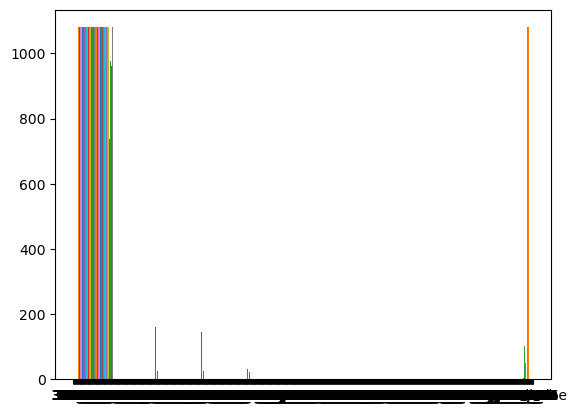

In [14]:
plt.hist(data)
plt.show()

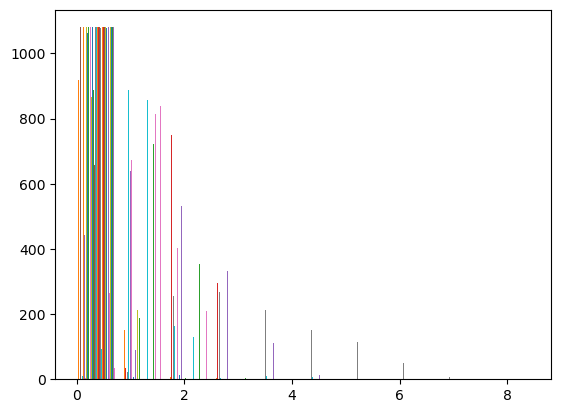

In [15]:
plt.hist(new_data) #data after imputation of missing values
plt.show()

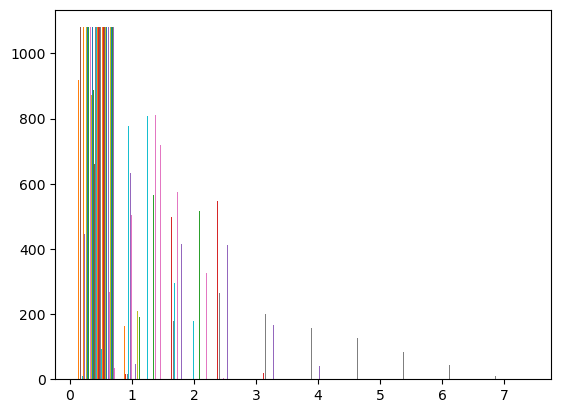

In [16]:
plt.hist(new_data1) #data after outlier detection
plt.show()

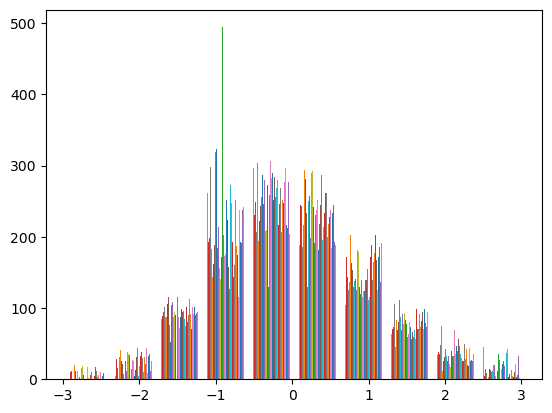

In [17]:
plt.hist(new_data2) #data after feature scaling
plt.show()  #Now data is normally distributed over the range with mean=0 and standard deviation=1

# Encoding Categorical Columns

In [18]:
categorical_cols = data.select_dtypes(exclude=[float]).columns
complete_data = pd.concat([new_data2, data[categorical_cols]], axis=1)
new_data3 = complete_data
final_data = pd.get_dummies(new_data3,columns = ['Genotype', 'Treatment', 'Behavior'])

In [19]:
final_data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3MeK4_N,CaNA_N,MouseID,class,Genotype_Control,Genotype_Ts65Dn,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C
0,0.633032,0.835561,2.302658,1.508742,2.344385,-0.361665,-0.165718,-0.899011,0.605089,1.229652,...,-1.529034,1.065901,309_1,c-CS-m,1,0,1,0,1,0
1,0.704057,0.504515,1.921734,1.430953,2.012014,-0.545969,-0.350893,-0.962120,0.443187,0.702592,...,-1.470282,1.280291,309_2,c-CS-m,1,0,1,0,1,0
2,0.668885,0.739052,2.057059,1.134142,1.943409,-0.613227,-0.237600,-0.968936,0.544142,0.583031,...,-1.544147,1.857038,309_3,c-CS-m,1,0,1,0,1,0
3,0.234727,0.094550,0.821820,0.495183,1.243451,-0.257757,-0.208727,-1.070286,-0.172396,0.698190,...,-1.154153,1.144490,309_4,c-CS-m,1,0,1,0,1,0
4,0.188341,0.096564,0.825460,0.201710,0.959326,-0.508313,-0.319308,-1.084430,-0.630088,0.388362,...,-1.124531,1.583530,309_5,c-CS-m,1,0,1,0,1,0


In [61]:
le = LabelEncoder()
a = new_data3['class']
le.fit(a)

LabelEncoder()

In [62]:
y = le.transform(a)

In [63]:
y

array([0, 0, 0, ..., 7, 7, 7])

In [64]:
y = pd.DataFrame(y, columns = ['class'])
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
1075,7
1076,7
1077,7
1078,7


In [41]:
final_data = final_data.drop(columns = 'class')

In [42]:
final_data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,EGR1_N,H3MeK4_N,CaNA_N,MouseID,Genotype_Control,Genotype_Ts65Dn,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C
0,0.633032,0.835561,2.302658,1.508742,2.344385,-0.361665,-0.165718,-0.899011,0.605089,1.229652,...,-1.433115,-1.529034,1.065901,309_1,1,0,1,0,1,0
1,0.704057,0.504515,1.921734,1.430953,2.012014,-0.545969,-0.350893,-0.962120,0.443187,0.702592,...,-1.346217,-1.470282,1.280291,309_2,1,0,1,0,1,0
2,0.668885,0.739052,2.057059,1.134142,1.943409,-0.613227,-0.237600,-0.968936,0.544142,0.583031,...,-1.391887,-1.544147,1.857038,309_3,1,0,1,0,1,0
3,0.234727,0.094550,0.821820,0.495183,1.243451,-0.257757,-0.208727,-1.070286,-0.172396,0.698190,...,-1.022510,-1.154153,1.144490,309_4,1,0,1,0,1,0
4,0.188341,0.096564,0.825460,0.201710,0.959326,-0.508313,-0.319308,-1.084430,-0.630088,0.388362,...,-1.209525,-1.124531,1.583530,309_5,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.977242,-0.779540,-1.325807,-0.592304,-1.348586,-0.543421,-0.411537,-0.813935,-0.162751,-1.133424,...,0.478257,2.479897,0.085303,J3295_11,0,1,0,1,0,1
1076,-0.865023,-0.719335,-1.392509,-0.391241,-1.129133,0.469528,0.026570,-0.791508,0.115388,-1.054382,...,0.366895,1.780990,0.084215,J3295_12,0,1,0,1,0,1
1077,-1.146570,-1.169143,-1.755107,-1.633471,-1.761644,-0.314649,-0.794756,-1.196030,-0.845688,-1.725515,...,1.121747,2.586971,0.293525,J3295_13,0,1,0,1,0,1
1078,-1.194837,-1.068257,-1.551118,-1.218153,-1.583826,-0.616152,-0.319448,-1.121544,-0.633603,-1.595071,...,1.702039,2.586971,0.208996,J3295_14,0,1,0,1,0,1


In [65]:
preprocessed_data = pd.concat([final_data, y], axis=1)

In [68]:
preprocessed_data.sample(10)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3MeK4_N,CaNA_N,MouseID,Genotype_Control,Genotype_Ts65Dn,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C,class
1064,-1.488596,-1.438546,-0.752121,-0.837946,-1.362671,0.730345,0.035137,-0.516489,1.074872,-1.137451,...,1.488312,-0.128545,J1291_15,0,1,0,1,0,1,7
958,-1.252268,-1.312767,-1.653318,-2.728182,-2.203818,-0.984013,-1.495963,-1.259152,-1.750235,-2.106805,...,2.082429,-0.710033,3421_14,0,1,0,1,0,1,7
121,2.308130,2.420275,1.564815,1.906909,1.070182,0.311840,0.173173,0.233111,0.955411,2.093999,...,-1.305243,0.933845,3520_2,1,0,1,0,1,0,0
869,-0.085775,-0.449023,-0.601965,-1.461981,-1.610351,-0.375551,-0.499396,-0.188065,-0.409708,-0.748550,...,0.759048,0.958481,3476_15,0,1,0,1,1,0,5
898,2.290124,1.777445,-1.163058,-1.072021,-0.924955,-0.836838,-0.171121,-1.179516,-0.045463,1.941585,...,0.280124,0.774703,3498_14,0,1,0,1,1,0,5
845,0.444999,0.579036,0.150075,-0.352530,0.174694,1.122539,0.655895,-0.642056,-0.424239,1.039313,...,0.227488,-0.345852,18899_6,0,1,0,1,1,0,5
37,0.809156,0.840563,1.378624,0.803208,1.805068,0.114775,0.225455,-0.762937,-0.375961,1.105724,...,-0.893916,0.987643,320_8,1,0,1,0,1,0,0
708,-0.608643,-0.098557,-0.120732,0.275277,0.108418,0.289637,0.763394,0.452884,0.656505,-0.079064,...,1.736902,-0.426058,293_4,0,1,1,0,0,1,6
1037,0.228843,0.765848,2.477469,1.978593,2.574572,1.634314,0.260566,2.348491,2.670115,1.109534,...,-0.754068,-0.514331,3525_3,0,1,0,1,0,1,7
48,0.642410,0.541449,1.182001,1.796687,2.265742,-0.159177,-0.294194,-0.675257,-0.695452,0.493602,...,-1.094730,1.140377,321_4,1,0,1,0,1,0,0


In [70]:
preprocessed_data.to_csv("Preprocessed_data.csv",index=False)